<a href="https://colab.research.google.com/github/hyuna0926/Project_/blob/main/airplane/airplane_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비행기 만족도 조사

Gender: 여자 남자 성별(Female, Male)

Customer Type: 고객타입 (Loyal customer, disloyal customer)

Age: 승객 나이

Type of Travel: 비행 목적(Personal Travel, Business Travel)

Class: 승객의 비행기 클래스 (Business, Eco, Eco Plus)

Flight distance: 비행거리

Inflight wifi service: 기내 와이파이 서비스 만족도 (0:Not Applicable;1-5)

Departure/Arrival time convenient: 편리한 출발/도착 시간 만족도

Ease of Online booking: 온라인예약 만족도

Gate location: 탑승구 만족도

Food and drink: 음식과 물 만족도

Online boarding: 온라인 게시판 만족도

Seat comfort: 자리 편안함 만족도

Inflight entertainment: 기내 엔터테인먼트 만족도

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: 수하물 처리 만족도

Check-in service: 체크인 만족도

Inflight service: 기내 서비스 만족도

Cleanliness: 청결 만족도

Departure Delay in Minutes: 출발할 때 몇 분 지연됐는지

Arrival Delay in Minutes: 도착할 때 몇 분 지연됐는지

Satisfaction: 비행 만족도(Satisfaction, neutral or dissatisfaction)

비행기회사는 고객만족도가 60% 이상이 되기를 원한다.
<BR>그것을 위해 우리는 어떤 서비스를 제공할 것인지, 어디에 더 신경을 써야할지 확인해봐야한다. <br/>
특성을 확인해서 어떤 특성이 비행 만족이 될 것인지 예측하는 머신러닝을 만들어본다.<br>


In [ ]:
!pip install category_encoders
!pip install xgboost==1.4.2
!pip3 install eli5

!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 166.7 MB 14 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.9 MB/s 
     |████████████████████████████████| 133 kB 50.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=09e70c9608081b66b50b50126ad8c3bcb7c485b21baf308b08ddb8f92ff71f0a
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Fou

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [ ]:
from google.colab import files
files.upload();

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.shape, test.shape

((103904, 25), (25976, 25))

In [ ]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

(None, None)

In [ ]:
train.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

In [ ]:
train.isnull().sum(), test.isnull().sum() #결측값 있지만 트리모델이라 괜찮음

(Unnamed: 0                             0
 id                                     0
 Gender                                 0
 Customer Type                          0
 Age                                    0
 Type of Travel                         0
 Class                                  0
 Flight Distance                        0
 Inflight wifi service                  0
 Departure/Arrival time convenient      0
 Ease of Online booking                 0
 Gate location                          0
 Food and drink                         0
 Online boarding                        0
 Seat comfort                           0
 Inflight entertainment                 0
 On-board service                       0
 Leg room service                       0
 Baggage handling                       0
 Checkin service                        0
 Inflight service                       0
 Cleanliness                            0
 Departure Delay in Minutes             0
 Arrival Delay in Minutes         

## 1. 데이터 전처리, EDA, 시각화

In [ ]:
#필요없는 열 제거
train.drop(['Unnamed: 0','id'], axis=1, inplace=True)
test.drop(['Unnamed: 0','id'], axis=1, inplace=True)

- int타입과 object타입 구분해주기

In [ ]:
num_cols = [col for col in train.columns if train[col].dtype!='object']
cat_cols = [col for col in train.columns if col not in num_cols]

In [ ]:
cat_cols,num_cols

(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'],
 ['Age',
  'Flight Distance',
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking',
  'Gate location',
  'Food and drink',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Inflight service',
  'Cleanliness',
  'Departure Delay in Minutes',
  'Arrival Delay in Minutes'])

In [ ]:
train.Class.value_counts(normalize=True)

Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: Class, dtype: float64

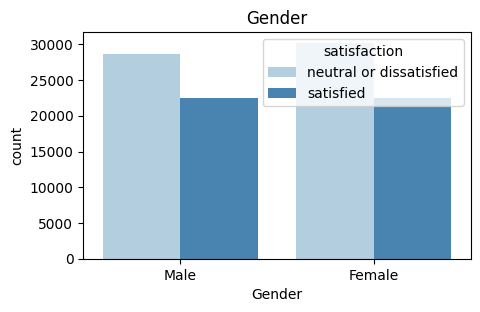

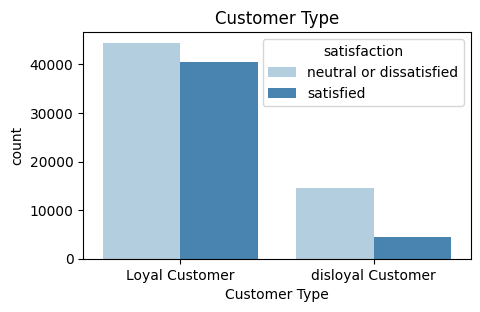

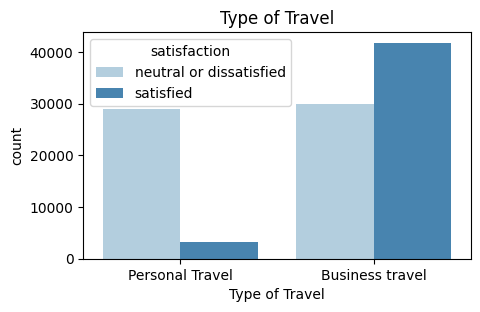

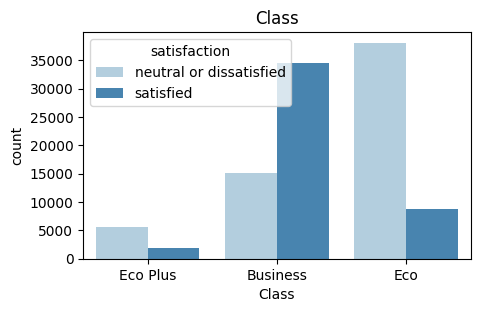

In [ ]:
for col in cat_cols[:-1]:
  plt.figure(figsize=(5,3), dpi=100)
  sns.countplot(data=train, x=col, hue='satisfaction',palette='Blues')
  plt.title(col)

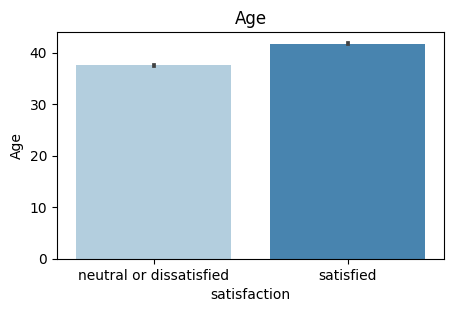

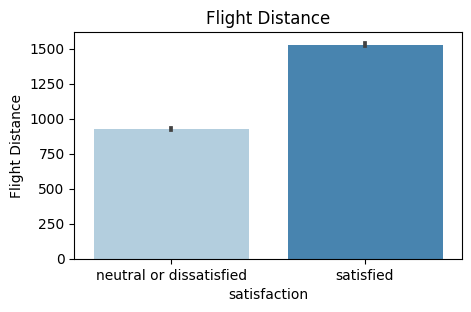

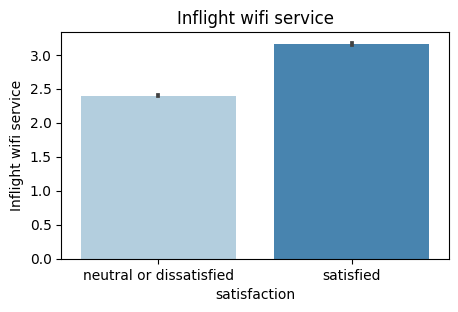

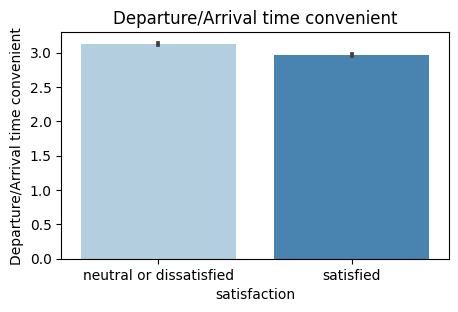

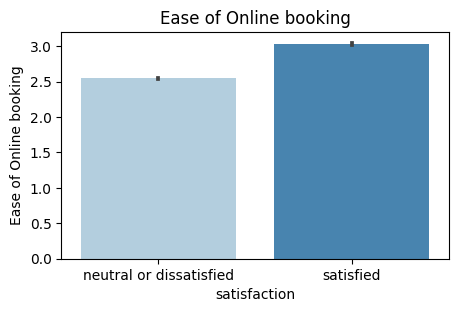

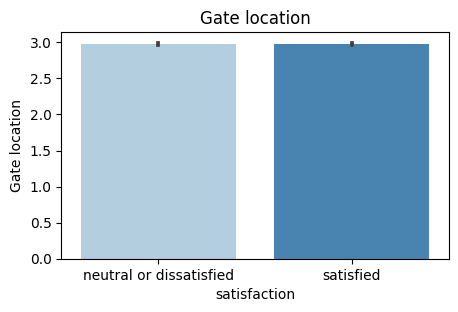

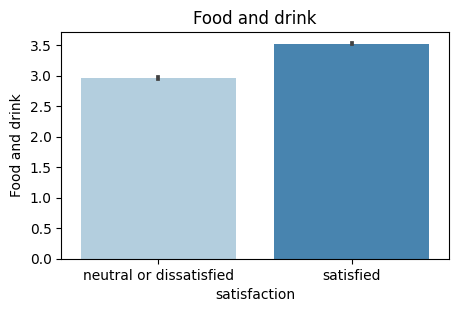

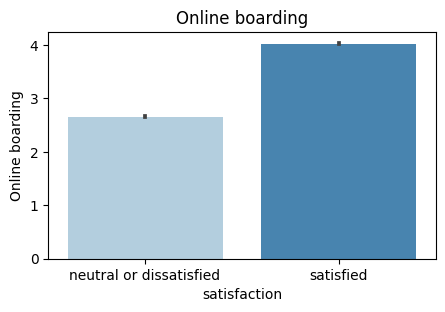

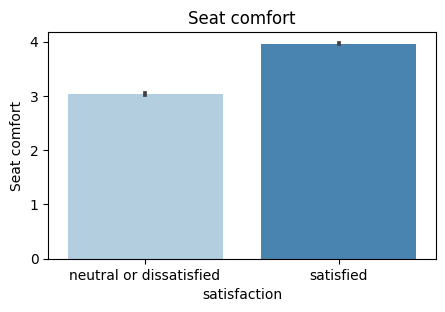

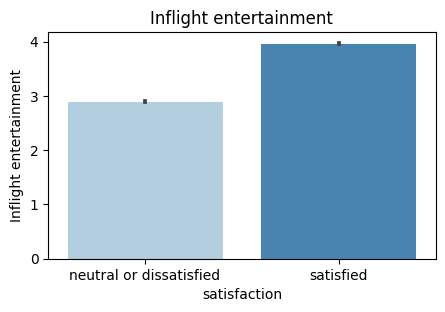

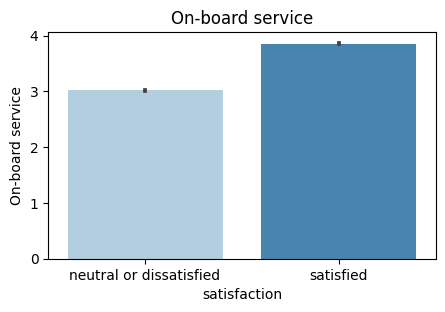

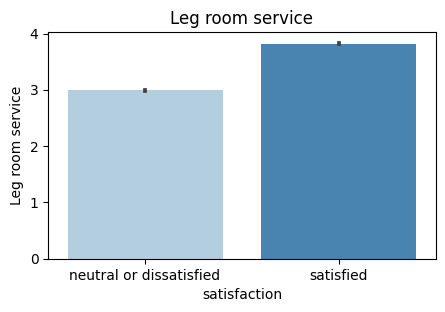

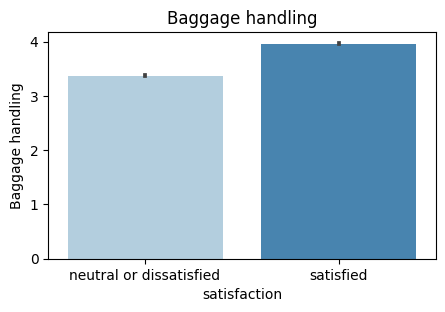

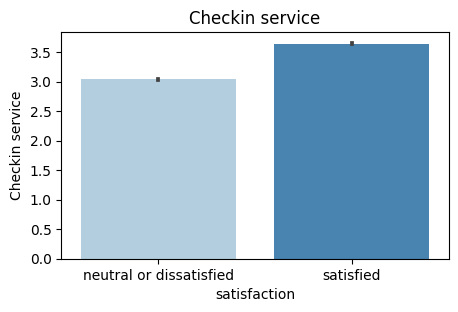

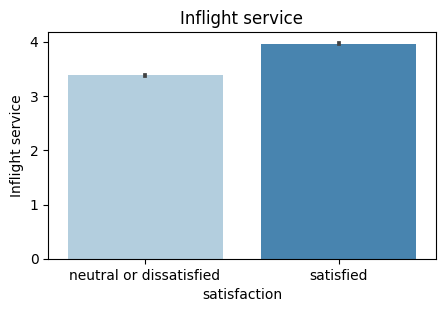

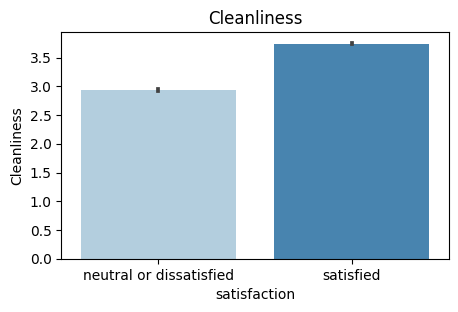

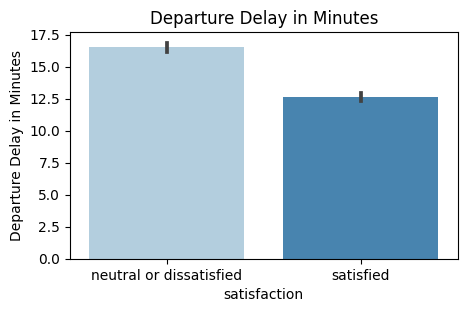

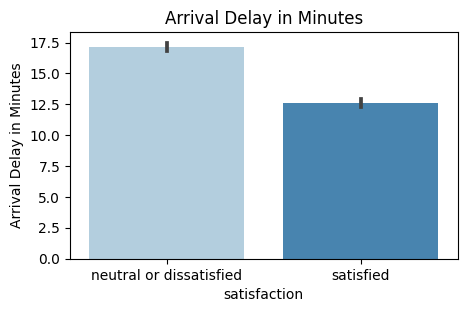

In [ ]:
for col in num_cols:
  plt.figure(figsize=(5,3), dpi=100)
  sns.barplot(data=train, y=col, x='satisfaction',palette='Blues')
  plt.title(col)

#### 가설2. 설문조사 만족도의 합이 높을수록 비행만족도가 높다.

In [ ]:
train['sum_satisfaction']=train.iloc[:,6:-3].sum(axis=1)
test['sum_satisfaction']=test.iloc[:,6:-3].sum(axis=1)

In [ ]:
train['sum_satisfaction'].describe()

count    103904.00000
mean         45.37014
std           9.26560
min          15.00000
25%          39.00000
50%          46.00000
75%          52.00000
max          70.00000
Name: sum_satisfaction, dtype: float64

In [ ]:
train.groupby('satisfaction')['sum_satisfaction'].mean()

satisfaction
neutral or dissatisfied    41.350193
satisfied                  50.627007
Name: sum_satisfaction, dtype: float64

Text(0.5, 1.0, 'satisfaction distribution')

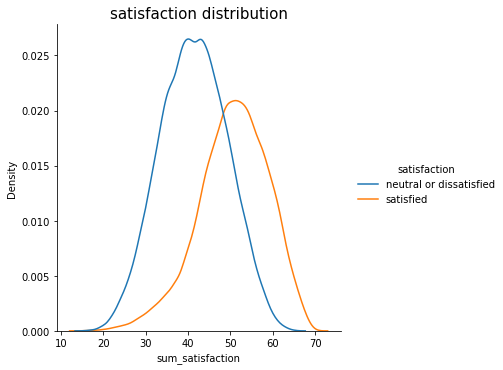

In [ ]:
sns.displot(data=train, x='sum_satisfaction', hue='satisfaction', kind='kde')
plt.title('satisfaction distribution', fontsize=15)

#### 가설3. 출발/도착 지연이 길어질수록 비행만족도가 떨어진다.

In [ ]:
train['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [ ]:
train['Departure Delay in Minutes'].unique() #1592

array([  25,    1,    0,   11,    9,    4,   28,   43,   49,    7,   17,
         52,   54,   27,   18,   19,    3,  109,   23,    8,   14,   10,
         51,   39,   13,   30,   64,   20,   45,   44,   31,   81,   35,
         67,   22,   40,   91,   21,   15,   29,  105,   12,  162,   24,
        141,    6,   34,    2,   97,   16,   99,   37,   66,   53,   36,
        209,   60,  149,   26,    5,   59,   62,  113,   38,   83,  176,
         46,   73,  199,   56,   93,   70,   80,   96,   57,   95,   74,
        172,   63,  175,  143,   48,   47,  101,  118,   76,  220,   33,
         55,  232,  170,  173,  124,  112,   94,  243,  128,   92,  270,
         90,  110,   50,  144,   71,  315,  158,   88,   65,  111,   32,
        156,   41,  154,  150,  228,   72,  137,  126,  161,   42,  174,
        103,  313,  136,  160,  412,   69,  185,  114,  135,  142,  147,
         85,  235,  125,  391,   84,  138,  102,  196,  140,   77,  187,
        131,   82,  100,   86,  165,   87,  129,  2

In [ ]:
train['Departure Delay in Minutes'][train['Departure Delay in Minutes'] != 0].count()

45236

In [ ]:
train['Departure Delay in Minutes'][train['Departure Delay in Minutes'] != 0].mean()

34.03046246352463

In [ ]:
train['Arrival Delay in Minutes'][train['Arrival Delay in Minutes'] != 0].count()


45435

In [ ]:
train['Arrival Delay in Minutes'][train['Arrival Delay in Minutes'] != 0].mean()

34.608121492241665

Text(0.5, 1.0, 'Delay satisfaction')

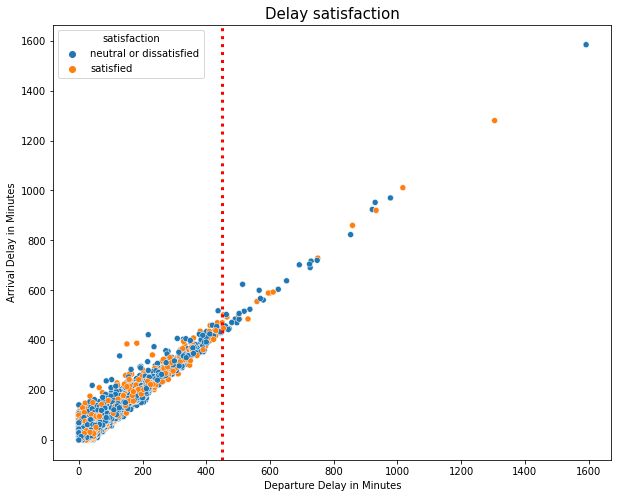

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', 
                hue='satisfaction', data=train)
plt.axvline(x=450, color='r', linestyle=':', linewidth=3)
plt.title('Delay satisfaction', fontsize=15)

In [ ]:
train.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.127536
satisfied                  12.630799
Name: Arrival Delay in Minutes, dtype: float64

In [ ]:
train.groupby('satisfaction')['Departure Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    16.503728
satisfied                  12.608084
Name: Departure Delay in Minutes, dtype: float64

#### 가설4. 비행기 거리가 길어질수록 비행만족도가 떨어진다

In [ ]:
train.groupby('satisfaction')['Flight Distance'].mean()

satisfaction
neutral or dissatisfied     928.919971
satisfied                  1530.140255
Name: Flight Distance, dtype: float64

Text(0.5, 1.0, 'Flight Distance distribution')

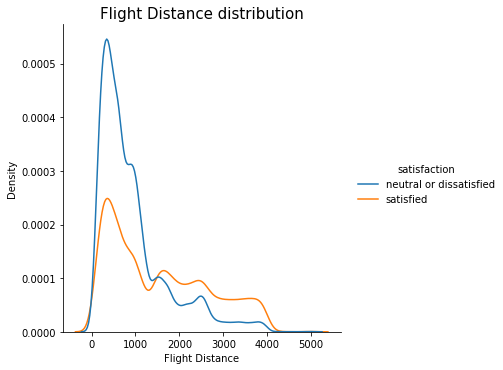

In [ ]:
sns.displot(data=train, x='Flight Distance', hue='satisfaction', kind='kde')
plt.title('Flight Distance distribution', fontsize=15)

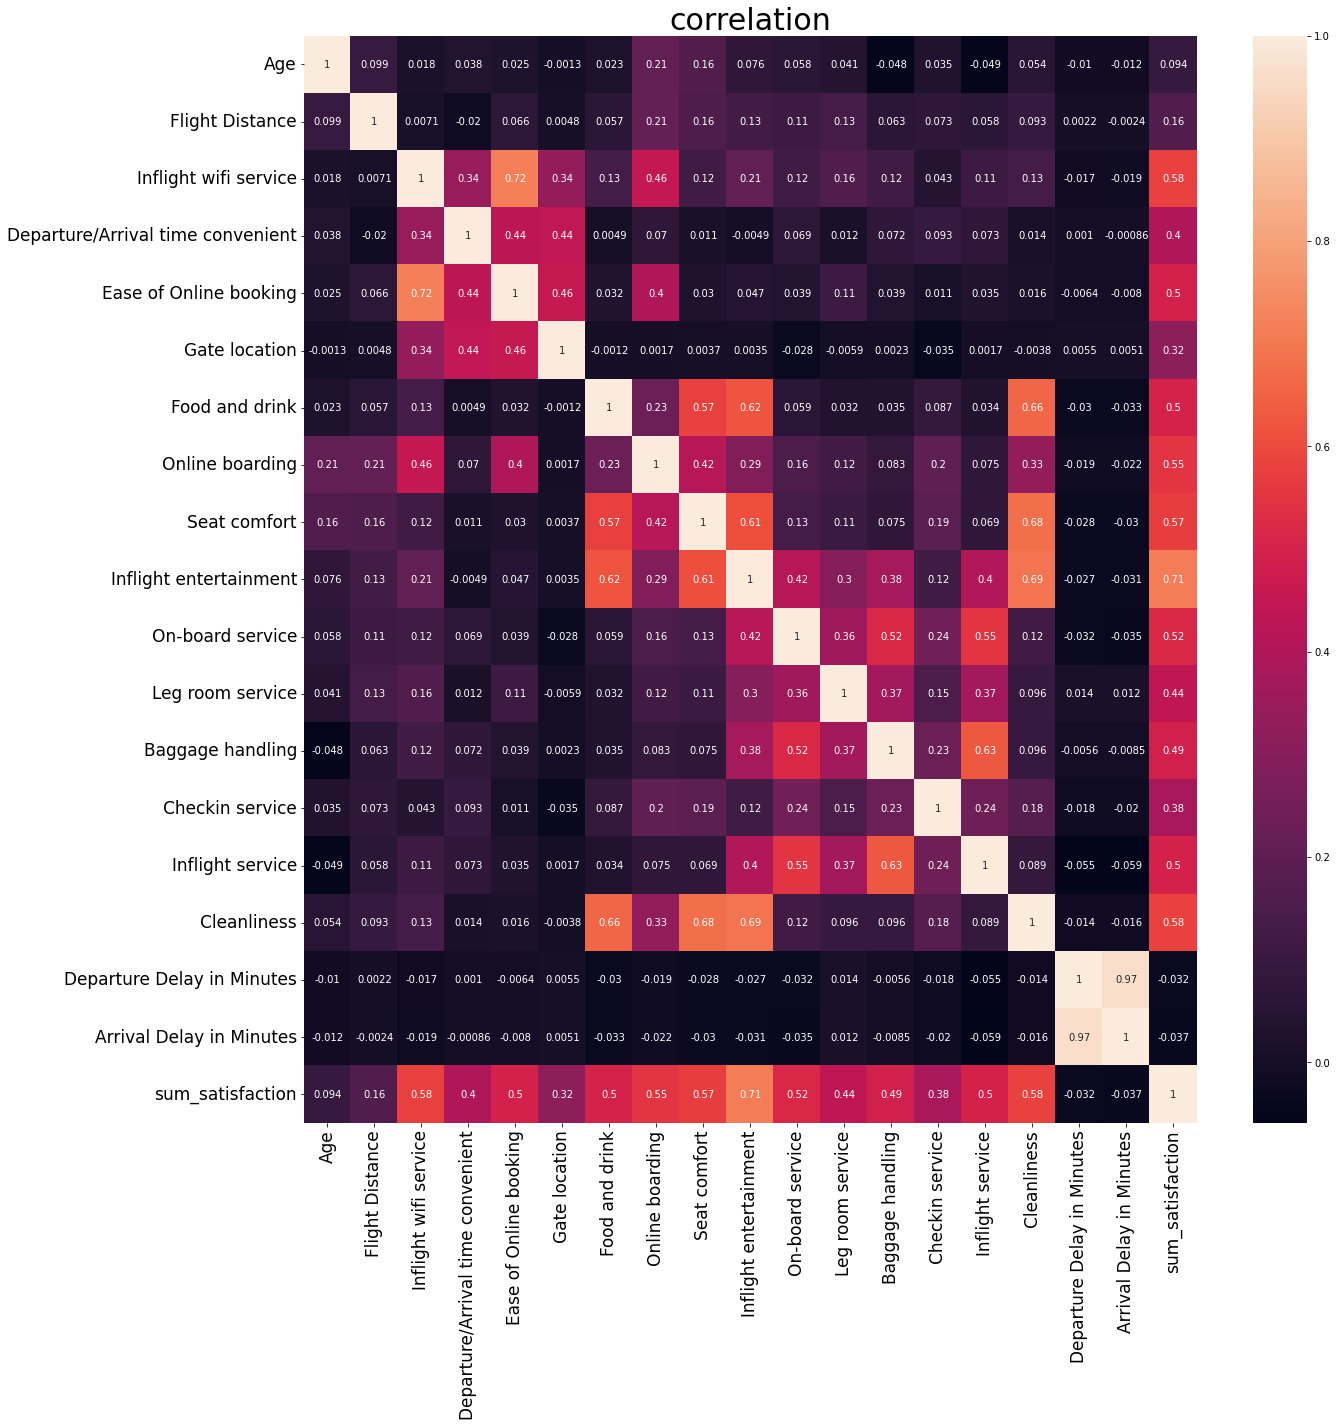

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True)
plt.title('correlation', fontsize=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

각 컬럼 별 상관관계를 확인해보니, 출발 시간과 도착 시간 간의 상관관계가 높게 나왔고, ease of online booking과 inflight wifi service도 높다. 상관관계가 높다는 뜻이 그만큼 둘의 일정한 관계가 있다는 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


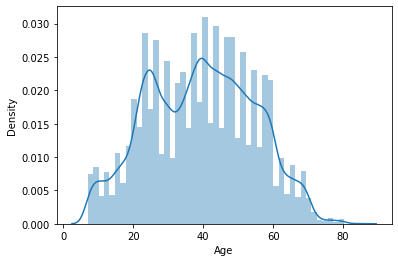

In [ ]:
sns.distplot(train.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


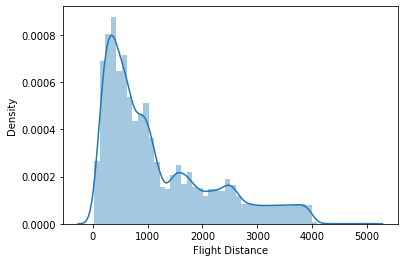

In [ ]:
sns.distplot(train['Flight Distance'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


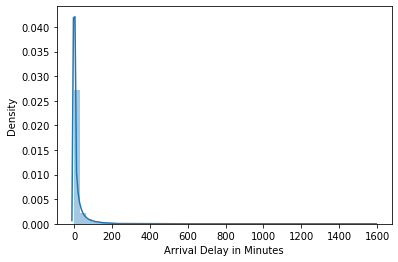

In [ ]:
sns.distplot(train['Arrival Delay in Minutes'])

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


만족도에 있는 0은 어떻게 처리하는 것이 좋을까??!!!!!<Br>
-> 삭제? 평균으로 대체?<br>
-> 의미있는 값이라 생각이 들어 나뒀음

<function matplotlib.pyplot.show(*args, **kw)>

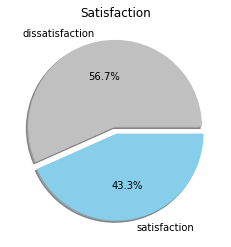

In [ ]:
plt.pie(train['satisfaction'].value_counts(normalize=True),
        labels=['dissatisfaction','satisfaction'],
        colors=['silver','skyblue'],autopct='%.1f%%',explode=[0.05,0.03]
        , shadow=True)
plt.title('Satisfaction')
plt.show

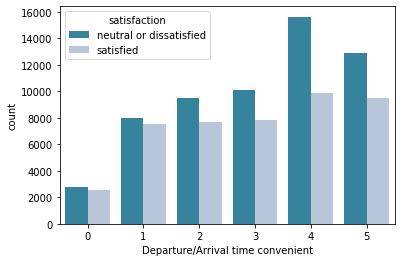

In [ ]:
sns.countplot(data=train, x='Departure/Arrival time convenient', hue='satisfaction',palette='PuBuGn_r')

##2. 모델링 및 모델 해석

In [ ]:
#traget값 0,1로 변경
train.satisfaction=train.satisfaction.replace({'neutral or dissatisfied':0, 'satisfied':1})
test.satisfaction=test.satisfaction.replace({'neutral or dissatisfied':0, 'satisfied':1})


In [ ]:
test.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,sum_satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000,25976.000000,25976.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,0.438982,45.408146
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539,0.496272,9.258667
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,17.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,0.000000,39.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,0.000000,46.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,1.000000,52.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,1.000000,69.000000


In [ ]:
from sklearn.model_selection import train_test_split

target='satisfaction'

train,val = train_test_split(
    train, test_size=0.2, random_state=42 
)

train.shape, val.shape, test.shape

((83123, 24), (20781, 24), (25976, 24))

In [ ]:
features = train.drop(target, axis=1).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_test.shape

((83123, 23), (83123,), (20781, 23), (25976,))

In [ ]:
#기준모델
from sklearn.metrics import accuracy_score

base = y_train.mode()[0]
baseline = len(y_train)*[base]
baseline_acc = accuracy_score(y_train, baseline)
print('기준모델의 정확도:', baseline_acc.round(3))

기준모델의 정확도: 0.567


In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import uniform
from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np
from hyperopt import hp
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
#from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt


### 1. decisiontree

In [ ]:
#decisiontree
dt_params = {
    'decisiontree__max_depth':hp.quniform('max_depth', 2,10,2),
    'decisiontree__min_samples_leaf': hp.quniform('min_samples_leaf', 10,20,2),

}

def get_pipe(dt_params):
    dt_params["decisiontree__max_depth"] = int(
        dt_params["decisiontree__max_depth"]
    )  # max_depth는 정수형으로 변환해 줍니다.
    dt_pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        DecisionTreeClassifier(
            random_state=42, class_weight='balanced',
        ),
    )
    #dt_pipe = dt_pipe.set_params(**dt_params)
    return dt_pipe


def fit_and_eval(dt_params):
    dt_pipe = get_pipe(dt_params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.
    score = cross_val_score(dt_pipe, X_train, y_train, cv=3, scoring="roc_auc")
    avg_cv_score = np.mean(score)
    # roc_auc는 클수록 좋은 metric이므로, hyperopt.fmin이 roc_auc를 최대화하도록 하기 위해 -부호를 붙여 반환합니다.
    return {"loss": -avg_cv_score, "status": STATUS_OK}


trials = (
    Trials()
)  # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=dt_params, algo=tpe.suggest, max_evals=10
)  # max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.



100%|██████████| 10/10 [00:23<00:00,  2.32s/it, best loss: -0.9417364318985982]


In [ ]:
print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 AUC: ", -trials.best_trial["result"]["loss"])

최적 하이퍼파라미터:  {'max_depth': [6.0], 'min_samples_leaf': [20.0]}
최적 AUC:  0.9417364318985982


In [ ]:
dt_auc =  -trials.best_trial["result"]["loss"]
dt_auc

0.9417364318985982

In [ ]:
dt = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      DecisionTreeClassifier(
          random_state=42, class_weight='balanced', 
          max_depth=8, min_samples_leaf=12
      )
)


dt.fit(X_train, y_train)

print('훈련정확도', dt.score(X_train, y_train))
print('검증정확도', dt.score(X_val, y_val))
y_pred_proba = dt.predict_proba(X_val)[:,1]
print('roc_auc', roc_auc_score(y_val, y_pred_proba))

y_val_pred = dt.predict(X_val)
print(classification_report(y_val,y_val_pred))



훈련정확도 0.9380556524668263
검증정확도 0.9352774168711804
roc_auc 0.983591297127585
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     11713
           1       0.92      0.93      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


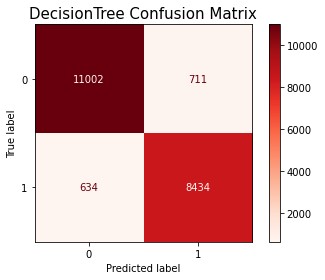

In [ ]:
plot_confusion_matrix(dt, X_val, y_val, cmap=plt.cm.Reds)
plt.title("DecisionTree Confusion Matrix", fontsize=15)
plt.show()

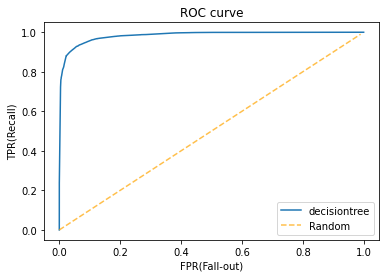

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = dt.predict_proba(X_val)[:,1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(fpr, tpr, label='decisiontree')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

### 2. RandomForestClassifier

In [ ]:
#RandomForestClassifier
rf_params = {
    'randomforest__max_depth':hp.quniform('max_depth', 2,10,2),
    'randomforest__min_samples_leaf': hp.quniform('min_samples_leaf', 10,20,2),
    'randomforest__max_samples': hp.quniform('max_samples', 6,16,2),
    'randomforest__min_samples_split': hp.quniform('min_samples_split',2,10,2),

}

def get_pipe(rf_params):
    rf_params["randomforest__max_depth"] = int(
        rf_params["randomforest__max_depth"]
    )  # max_depth는 정수형으로 변환해 줍니다.
    rf_pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        RandomForestClassifier(
            n_estimators=200,
            random_state=42, class_weight='balanced',
            n_jobs=-1, 
        ),
    )
    #dt_pipe = dt_pipe.set_params(**dt_params)
    return rf_pipe


def fit_and_eval(rf_params):
    rf_pipe = get_pipe(rf_params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.
    score = cross_val_score(rf_pipe, X_train, y_train, cv=3, scoring="roc_auc")
    avg_cv_score = np.mean(score)
    # roc_auc는 클수록 좋은 metric이므로, hyperopt.fmin이 roc_auc를 최대화하도록 하기 위해 -부호를 붙여 반환합니다.
    return {"loss": -avg_cv_score, "status": STATUS_OK}


trials = (
    Trials()
)  # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=rf_params, algo=tpe.suggest, max_evals=10
)  # max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.



100%|██████████| 10/10 [07:01<00:00, 42.19s/it, best loss: -0.9931315065667511]


In [ ]:
print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 AUC: ", -trials.best_trial["result"]["loss"])
#확인해보니 과대적합임 적당히 하이퍼파라미터를 주자

최적 하이퍼파라미터:  {'max_depth': [4.0], 'max_samples': [10.0], 'min_samples_leaf': [14.0], 'min_samples_split': [10.0]}
최적 AUC:  0.9931315065667511


In [ ]:
rf_auc = -trials.best_trial["result"]["loss"]

In [ ]:
rf=make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(
        n_estimators=200, random_state=42, class_weight='balanced',
        n_jobs=-1, max_depth=6, max_samples=12,
        #min_samples_leaf=12, min_samples_split=2  #roc_auc는 뭘까 왜저래
    )
)

rf.fit(X_train, y_train)

print('훈련정확도', rf.score(X_train, y_train))
print('검증정확도', rf.score(X_val, y_val))

y_pred_proba = rf.predict_proba(X_val)[:,1]
print('roc_auc', roc_auc_score(y_val, y_pred_proba))

y_val_pred = rf.predict(X_val)
print(classification_report(y_val,y_val_pred))

훈련정확도 0.8312380448251386
검증정확도 0.8322506135412155
roc_auc 0.9178286487617713
              precision    recall  f1-score   support

           0       0.80      0.95      0.86     11713
           1       0.91      0.69      0.78      9068

    accuracy                           0.83     20781
   macro avg       0.85      0.82      0.82     20781
weighted avg       0.84      0.83      0.83     20781



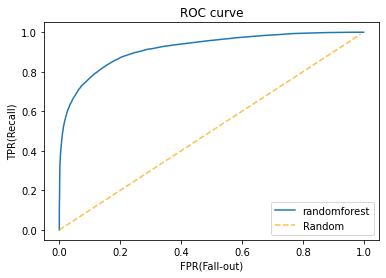

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = rf.predict_proba(X_val)[:,1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(fpr, tpr, label='randomforest')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


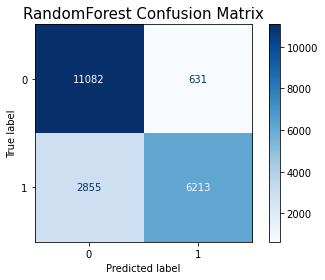

In [ ]:
plot_confusion_matrix(rf, X_val, y_val, cmap=plt.cm.Blues)
plt.title("RandomForest Confusion Matrix", fontsize=15)
plt.show()

### 3. XGBClassifier

In [ ]:
#XGBClassifier
xgb_params = {
    'xgbclassifier__max_depth':hp.quniform('max_depth', 2,10,2),
    'xgbclassifier__min_child_weight': hp.quniform('min_child_weight', 10,20,2),
    'xgbclassifier__max_leaves': hp.quniform('max_leaves', 6,16,2),
    'xgbclassifier__colsample_bytree': hp.uniform('colsample_bytree',0.5,1.0),

}

def get_pipe(xgb_params):
    xgb_params["xgbclassifier__max_depth"] = int(
        xgb_params["xgbclassifier__max_depth"]
    )  # max_depth는 정수형으로 변환해 줍니다.
    xgb_pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        XGBClassifier(
            objective='binary:logistic',
            eval_metric='error',
            n_estimators=200,
            random_state=42,
            n_jobs=-1, learning_rate=0.1
        ),
    )
    #dt_pipe = dt_pipe.set_params(**dt_params)
    return xgb_pipe


def fit_and_eval(xgb_params):
    xgb_pipe = get_pipe(xgb_params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.
    score = cross_val_score(xgb_pipe, X_train, y_train, cv=3, scoring="roc_auc")
    avg_cv_score = np.mean(score)
    # roc_auc는 클수록 좋은 metric이므로, hyperopt.fmin이 roc_auc를 최대화하도록 하기 위해 -부호를 붙여 반환합니다.
    return {"loss": -avg_cv_score, "status": STATUS_OK}


trials = (
    Trials()
)  # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=xgb_params, algo=tpe.suggest, max_evals=10
)  # max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.


  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 10%|█         | 1/10 [00:38<05:42, 38.07s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 20%|██        | 2/10 [01:15<05:02, 37.80s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 30%|███       | 3/10 [01:54<04:26, 38.08s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 40%|████      | 4/10 [02:33<03:51, 38.53s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 50%|█████     | 5/10 [03:10<03:10, 38.05s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 60%|██████    | 6/10 [03:47<02:30, 37.61s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 70%|███████   | 7/10 [04:23<01:51, 37.29s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 80%|████████  | 8/10 [05:02<01:15, 37.86s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

 90%|█████████ | 9/10 [05:41<00:38, 38.07s/it, best loss: -0.9945590179460044]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label enco

100%|██████████| 10/10 [06:18<00:00, 37.83s/it, best loss: -0.9945590179460044]


In [ ]:
print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 AUC: ", -trials.best_trial["result"]["loss"])

최적 하이퍼파라미터:  {'colsample_bytree': [0.7131760832725621], 'max_depth': [8.0], 'max_leaves': [12.0], 'min_child_weight': [18.0]}
최적 AUC:  0.9945590179460044


In [ ]:
xgb=make_pipeline(
    #OrdinalEncoder(),
    #SimpleImputer(),
    XGBClassifier(
            objective='binary:logistic',
            eval_metric='error',
            n_estimators=200,
            random_state=42,
            n_jobs=-1, learning_rate=0.1,
            colsample_bytree=0.582, max_depth=10,
            max_leaves=8, min_child_weight=14
    )
)

ord = OrdinalEncoder()
sim = SimpleImputer()
X_train_ord = ord.fit_transform(X_train)
X_train_sim = sim.fit_transform(X_train_ord)
X_train_en = pd.DataFrame(X_train_sim, columns=X_train.columns)

X_val_ord = ord.transform(X_val)
X_val_sim = sim.transform(X_val_ord)
X_val_en = pd.DataFrame(X_val_sim, columns=X_val.columns)


X_test_ord = ord.transform(X_test)
X_test_sim = sim.transform(X_test_ord)
X_test_en = pd.DataFrame(X_test_sim, columns=X_test.columns)


xgb.fit(X_train_en, y_train)

print('훈련정확도', xgb.score(X_train_en, y_train))
print('검증정확도', xgb.score(X_val_en, y_val))

y_pred_proba = xgb.predict_proba(X_val_en)[:,1]
print('roc_auc', roc_auc_score(y_val, y_pred_proba))

y_val_pred = xgb.predict(X_val_en)
print(classification_report(y_val,y_val_pred))

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


훈련정확도 0.9780686452606379
검증정확도 0.9629950435493961
roc_auc 0.9951569708418566
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



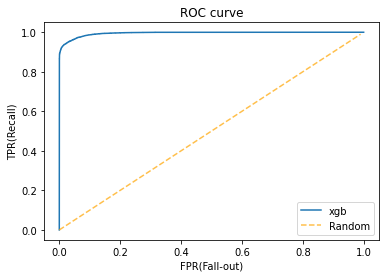

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = xgb.predict_proba(X_val_en)[:,1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(fpr, tpr, label='xgb')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


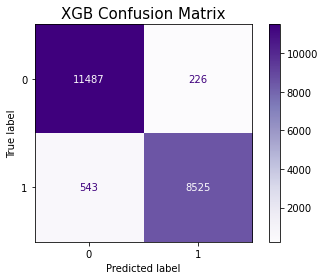

In [ ]:
plot_confusion_matrix(xgb, X_val_en, y_val, cmap=plt.cm.Purples)
plt.title("XGB Confusion Matrix", fontsize=15)
plt.show()



In [ ]:
val_score = pd.DataFrame([dt.score(X_val, y_val),rf.score(X_val, y_val),xgb.score(X_val_en, y_val)],
             columns = ['score'], index = ['decision','randomforest','xgb'])
val_score

,score
decision,0.935277
randomforest,0.832251
xgb,0.962995


Text(0.5, 1.0, 'val_score')

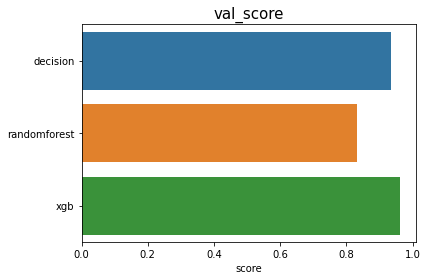

In [ ]:
#plt.style.use('ggplot')
sns.barplot(x='score', y= val_score.index ,data=val_score)
plt.title('val_score', fontsize=15)

성능이 높은 xgb 선택



---
#### 특성중요도


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    xgb,
    scoring='accuracy', n_iter=10,
    random_state=42
)

#X_val_preprocessed = xgb[0:2].transform(X_val)
#X_val_preprocessed = pd.DataFrame(X_val_preprocessed, columns=X_val.columns)

permuter.fit(X_val_en, y_val)

feature_names = X_val_en.columns.tolist()
eli5.show_weights(
    permuter, top=None, feature_names=feature_names
)

Weight,Feature
0.1520 ± 0.0023,Type of Travel
0.1372 ± 0.0034,Inflight wifi service
0.0583 ± 0.0021,Customer Type
0.0256 ± 0.0012,Baggage handling
0.0241 ± 0.0030,Online boarding
0.0217 ± 0.0011,Inflight service
0.0205 ± 0.0020,Checkin service
0.0187 ± 0.0020,Seat comfort
0.0108 ± 0.0010,Cleanliness
0.0052 ± 0.0010,Class


Text(0.5, 1.0, 'Permuter Importance')

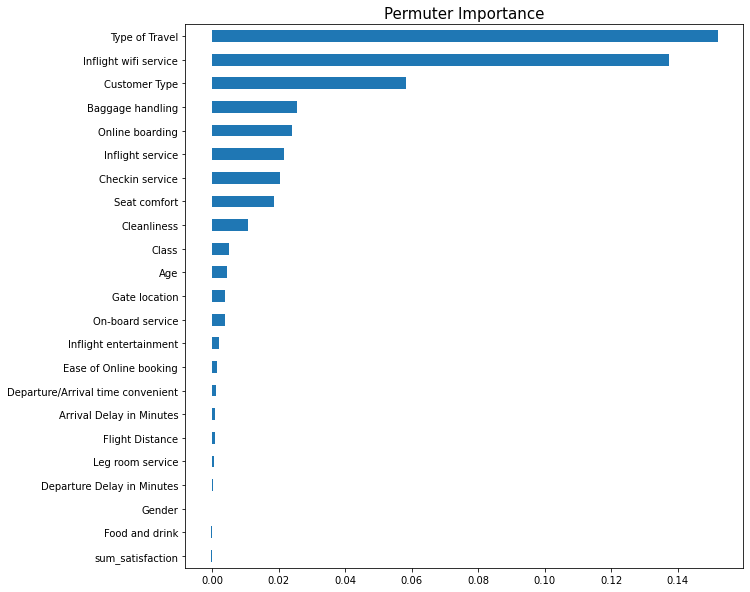

In [ ]:
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
plt.figure(figsize=(10,10))
pi.plot.barh()
plt.title('Permuter Importance', size=15)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6b12459810>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6b123f47d0>})

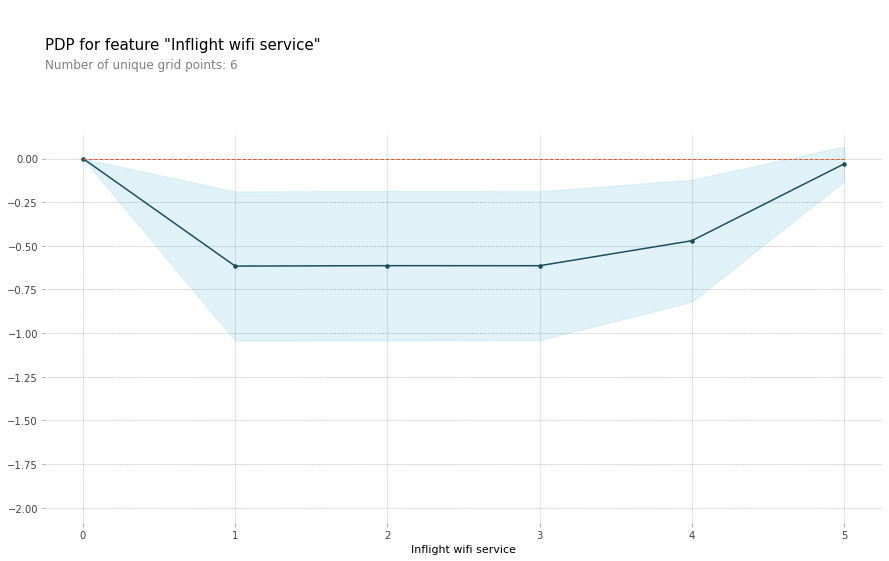

In [ ]:
#pdp
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = 'Inflight wifi service'

isolated = pdp_isolate(
    model = xgb,
    dataset = X_val_en,
    model_features = X_val_en.columns,
    feature = target_feature,
    grid_type='percentile',
)

pdp_plot(isolated, feature_name=target_feature)


(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6b12359810>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6b12310190>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6b122cb5d0>}})

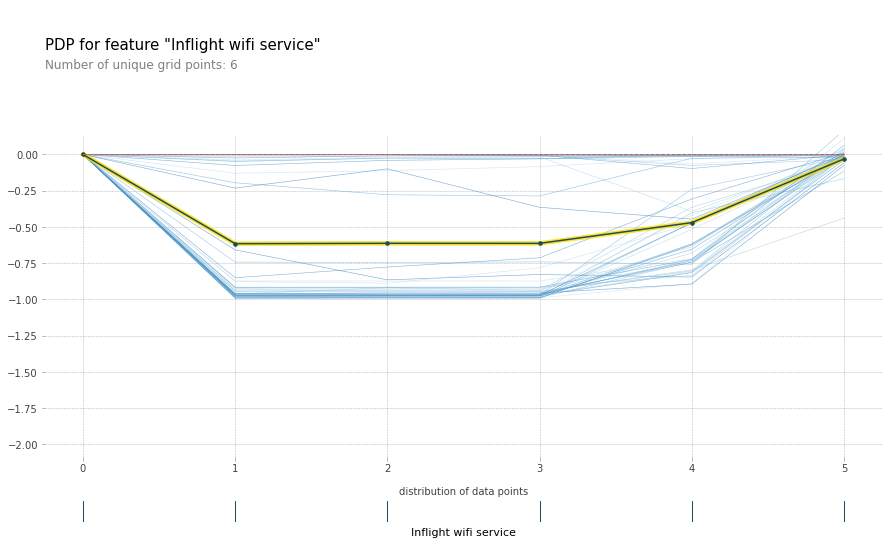

In [ ]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

0을 제외한 1부터 보면 점수가 올라갈수록 만족한다고 응답할 확률이 높아진다는 것을 알 수 있다.

In [ ]:
mappings=ord.mapping
mappings

[{'col': 'Gender', 'mapping': Female    1
  Male      2
  NaN      -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Customer Type', 'mapping': Loyal Customer       1
  disloyal Customer    2
  NaN                 -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Type of Travel', 'mapping': Personal Travel    1
  Business travel    2
  NaN               -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Class', 'mapping': Eco         1
  Business    2
  Eco Plus    3
  NaN        -2
  dtype: int64, 'data_type': dtype('O')}]

In [ ]:
mapping_data = list(filter(lambda x: x["col"] == target_feature, mappings))
maps=mapping_data[0]['mapping']
encoded_features = maps.values.tolist()
original_features = maps.index.tolist()

In [ ]:
target_feature = 'Type of Travel'

isolated = pdp_isolate(
    model = xgb,
    dataset = X_val_en,
    model_features = X_val_en.columns,
    feature = target_feature,
    grid_type='percentile',
)

pdp_plot(isolated, feature_name=target_feature)
#plt.xticks(encoded_features, original_features, rotation=45)
#business 2, personal 1
#출장보다 개인여행에서 더 만족감을 느끼지 못한다.

In [ ]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

In [ ]:
target_feature = 'Customer Type'

isolated = pdp_isolate(
    model = xgb,
    dataset = X_val_en,
    model_features = X_val_en.columns,
    feature = target_feature,
    grid_type='percentile',
)

pdp_plot(isolated, feature_name=target_feature)
#plt.xticks(encoded_features, original_features, rotation=45)
#disloyal Customer 2, Loyal Customer 1
#loyal 고객일수록 더 만족한다고 응답했다.

In [ ]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

#### 특성중요도 drop xgbclassifier

In [ ]:
features = pi[pi.values>0.02].index
features
target='satisfaction'

X =train[features]
y=train[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test[features]
y_test =test[target]
X_train.shape, y_val.shape, X_test.shape

In [ ]:
#XGBClassifier
xgb_params = {
    'xgbclassifier__max_depth':hp.quniform('max_depth', 2,10,2),
    'xgbclassifier__min_child_weight': hp.quniform('min_child_weight', 10,20,2),
    'xgbclassifier__max_leaves': hp.quniform('max_leaves', 6,16,2),
    'xgbclassifier__colsample_bytree': hp.uniform('colsample_bytree',0.5,1.0),

}

def get_pipe(xgb_params):
    xgb_params["xgbclassifier__max_depth"] = int(
        xgb_params["xgbclassifier__max_depth"]
    )  # max_depth는 정수형으로 변환해 줍니다.
    xgb_pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        XGBClassifier(
            objective='binary:logistic',
            eval_metric='error',
            n_estimators=200,
            random_state=42,
            n_jobs=-1, learning_rate=0.1
        ),
    )
    #dt_pipe = dt_pipe.set_params(**dt_params)
    return xgb_pipe


def fit_and_eval(xgb_params):
    xgb_pipe = get_pipe(xgb_params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.
    score = cross_val_score(xgb_pipe, X_train, y_train, cv=3, scoring="roc_auc")
    avg_cv_score = np.mean(score)
    # roc_auc는 클수록 좋은 metric이므로, hyperopt.fmin이 roc_auc를 최대화하도록 하기 위해 -부호를 붙여 반환합니다.
    return {"loss": -avg_cv_score, "status": STATUS_OK}


trials = (
    Trials()
)  # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=xgb_params, algo=tpe.suggest, max_evals=10
)  # max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.


In [ ]:
print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 AUC: ", -trials.best_trial["result"]["loss"])

In [ ]:
xgb_drop=make_pipeline(
    #OrdinalEncoder(),
    #SimpleImputer(),
    XGBClassifier(
            objective='binary:logistic',
            eval_metric='error',
            n_estimators=200,
            random_state=42,
            n_jobs=-1, learning_rate=0.1,
            colsample_bytree=0.8934, max_depth=2,
            max_leaves=14, min_child_weight=14
    )
)

ord = OrdinalEncoder()
sim = SimpleImputer()
X_train_ord = ord.fit_transform(X_train)
X_train_sim = sim.fit_transform(X_train_ord)
X_train_en = pd.DataFrame(X_train_sim, columns=X_train.columns)

X_val_ord = ord.transform(X_val)
X_val_sim = sim.transform(X_val_ord)
X_val_en = pd.DataFrame(X_val_sim, columns=X_val.columns)


X_test_ord = ord.transform(X_test)
X_test_sim = sim.transform(X_test_ord)
X_test_en = pd.DataFrame(X_test_sim, columns=X_test.columns)


xgb_drop.fit(X_train_en, y_train)

print('훈련정확도', xgb_drop.score(X_train_en, y_train))
print('검증정확도', xgb_drop.score(X_val_en, y_val))

y_pred_proba = xgb_drop.predict_proba(X_val_en)[:,1]
print('roc_auc', roc_auc_score(y_val, y_pred_proba))

y_val_pred = xgb_drop.predict(X_val_en)
print(classification_report(y_val,y_val_pred))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plot_confusion_matrix(xgb, X_val_en, y_val, cmap=plt.cm.Greens)
plt.title("XGB_drop Confusion Matrix", fontsize=15)
plt.show()




---
특성중요도를 보고 0.02보다 작은 값을 드롭하여 xgbclassifier로 계산해보니 정확도와 roc_auc 점수가 드롭하기 전보다 낮게 나왔다. 하지만 이 결과가 무조건 안좋다고 보긴 어렵다. 고차원의 문제를 해결해주고, 시간과 비용을 절약해주기때문이다. 하지만 현재 데이터는 많은 컬럼을 가지고 있지 않기 때문에 드롭을 해주지 않는 것을 선택했다.   

## 모델 선택(XGB)


In [ ]:
test_pred = xgb.predict(X_test_sim)
accuracy_score(y_test, test_pred)

In [ ]:
y_pred_proba = xgb.predict_proba(X_test_en)[:,1]
print('roc_auc', roc_auc_score(y_test, y_pred_proba))

In [ ]:
y_test_pred = xgb.predict(X_test_en)
print(classification_report(y_test,y_test_pred))

In [ ]:
plot_confusion_matrix(xgb, X_test_en, y_test, cmap=plt.cm.Greens)
plt.title("XGB_test Confusion Matrix", fontsize=15)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = xgb.predict_proba(X_test_en)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='xgb')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

## train+test 합쳐서 확인

In [ ]:
data = pd.concat([train, test])
data.head()

In [ ]:
train.shape[0]+test.shape[0]

In [ ]:
data.info()

In [ ]:
target = 'satisfaction'
X = data.drop(target, axis=1)
y = data[target]

In [ ]:
X_ord = ord.transform(X)
X_sim = sim.transform(X_ord)
X_en = pd.DataFrame(X_sim, columns=X.columns)
X_en

In [ ]:
y_pred = xgb.predict(X_en)
print(classification_report(y,y_pred))

In [ ]:
y_pred_proba = xgb.predict_proba(X_en)[:,1]
print('roc_auc', roc_auc_score(y, y_pred_proba))

In [ ]:
plot_confusion_matrix(xgb, X_en, y, cmap=plt.cm.Greens)
plt.title("XGB Confusion Matrix", fontsize=15)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = xgb.predict_proba(X_test_en)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='xgb')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();